## NLP2. 단어사전 만들기 

In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


### 데이터 불러오기, 전처리 

In [89]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [90]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


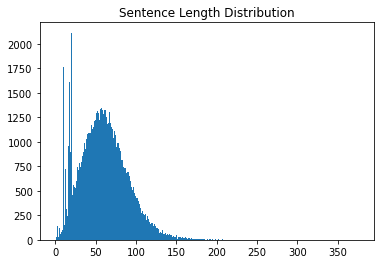

In [91]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

데이터에서 좀 더 살펴볼것은 2가지가 있다.  
1. 문장의 최단길이가 1인 문장
2. 위의 그래프에서 치솟은 부분

In [92]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


길이가 1인 문장은 ',' 아무 의미 없기 때문에 전처리에서 제거해줄 필요가 있다. 

In [93]:
for idx, _sum in enumerate(sentence_length):
    if _sum > 1500: 
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [94]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

중복 문장들이 많이 보인다. 전처리에서 제거해줄 필요가 있다. 

Data Size: 77591
문장의 최단길이: 1
문장의 최장길이: 377
문장의 평균길이: 138


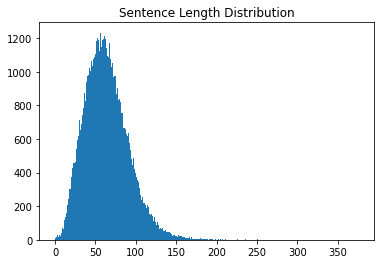

In [95]:
cleaned_corpus = list(set(raw)) #set를 이용해서 중복을 제거 
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus: 
    length = len(sen)
    if min_len > length: min_len = length 
    if max_len < length: max_len = length 
    sum_len += length 
        
print("문장의 최단길이:", min_len)
print("문장의 최장길이:", max_len)
print("문장의 평균길이:", sum_len//len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus: 
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리를 해야한다. 여기서는 문장길이 10-150 사이의 문장만 선택해서 학습한다. 

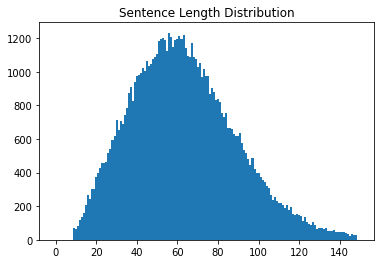

In [96]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# distribution 
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 공백기반 토큰화 
* tf.keras.preprocessing.text.Tokenizer: vectorize a text corpus by turning each text into a sequence of integers or into a vector. 
    * By default, all punctuation is removed, turning the texts into space-separated sequences of words (words maybe include the ' character). These sequences are then split into lists of tokens. They will then be indexed or vectorized.
    * 0 is a reserved index that won't be assigned to any word.
* fit_on_texts: updates internal vocab based on a list of texts. 
* texts_to_sequences: Transforms each text in texts to a sequence of integers (정수).

In [97]:
def tokenize(corpus):
    tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='') # tokenizer 객체 생성
    tokenizer.fit_on_texts(corpus) 
    
    tensor = tokenizer.texts_to_sequences(corpus) # text를 숫자로 변환 
    
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  # padding
    
    return tensor, tokenizer 

In [98]:
split_corpus = []

for kor in filtered_corpus: 
    split_corpus.append(kor.split())  

In [99]:
tensor1, tokenizer1 = tokenize(filtered_corpus) # filtered corpus

print("Split Vocab Size:", len(tokenizer1.index_word))

Split Vocab Size: 238086


In [100]:
split_tensor, split_tokenizer = tokenize(split_corpus) # split corpus

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [101]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)
    
    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [102]:
for idx, word in enumerate(tokenizer1.word_index):
    print(idx, ":", word)
    
    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


* 질문: 위에서 split_tokienizer 와 tokenizer1의 차이? 
* 공백 토큰화의 문제점: "밝혔다" 는 밝히다 , 밝다 등과 유사한 의미를 지니고 있음에도 전혀 다른 단어로 분류될 것이다.때문에 공백 기반 토큰화는 불필요하게 큰 단어 사전을 가지게 되며 이는 연산량 증가로 이어진다. 만일 밝 + 혔다 라고 토큰화했다면 어땠을까? 밝 + 히다, 밝 + 다 같은 구절이 등장했을 때, 공통된 어절인 밝 은 하나로 묶여 학습 중에 의미를 파악하기가 수월해 지고, 단어사전의 크기도 줄어들 수 있다. 

### 형태소 기반 토큰화 
한국어 형태소 분석기는 대표적으로 Khaiii와 KoNLPy가 있는데 여기서는 KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용해 보도록 한다. 

In [103]:
def mecab_split(sentence): 
    return mecab.morphs(sentence)
    
mecab_corpus = []

for kor in filtered_corpus: 
    mecab_corpus.append(mecab_split(kor))

In [104]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("mecab vocab size:", len(mecab_tokenizer.index_word))

mecab vocab size: 52279


vocab size가 공백기반보다 확연히 적은 것을 확인할 수 있다. 이는 곧 연산량의 감소와 빠른 학습으로 이어진다!      

**mecab (52,279) vs 공백기반 (237,435)**

### Google BERT wordpiece vs 엑소브레인 wordpiece 
구글에서 배포한 BERT 모델은 한국어 전용 코퍼스를 바탕으로 훈련된 것이 아니라 Multilingual 코퍼스를 바탕으로 훈련된 것이며, Word Piece 모델 안에 포함된 subword 안에도 한국어가 아닌 여러 언어의 것이 섞여 있어서 한국어 자연어처리 태스크에 특화된 모델이 아니다. (상세한 내용은 https://github.com/google-research/bert 참조)

엑소브레인의 것은 한국어 코퍼스에 특화된 형태로 언어모델과 토크나이저가 훈련된 것이므로 성능에서 우월하다. 엑소브레인의 wordpiece 중에서도 형태소 분석기 토크나이저가 성능이 우수했다. 한국어 문법과 의미정보를 바탕으로 개발된 형태소분석기가 정확하게 동작한다면 현재까지 가장 성능이 좋다고 알려진 Subword 기반의 토크나이저보다 더 성능이 좋을 수 있음을 시사한다. 

### 정교한 형태소분석기를 활용한 모델의 성능이 더 좋을 수 있음에도 불구하고 실무에서 SentencePiece 같은 Subword 기반 토크나이저가 더욱 각광받는 이유
정교한 형태소분석기의 성능을 유지하기 위해서는 지속적인 데이터관리와 유지보수 작업이 필요하다. 

그에 비해 SentencePiece 모델은 코퍼스데이터로부터 쉽게 추출해서 생성 가능하며, Subword 기반이기 때문에 새롭게 생성되는 단어에 대한 OOV(Out-of-Vocabulary) 문제에 대해서도 잘 대처할 수 있는 장점이 있다. 그리고 언어에 중립적이기 때문에 여러 언어가 섞여 나오는 텍스트를 처리하는 데에도 능하다. 

무엇보다도, 특정 언어에 대한 부가지식이 없이도 엔지니어가 그 언어에 대한 작업을 손쉽게 진행할 수 있도록 해준다는 점과 그 언어에 특화된 토크나이저의 성능에 뒤지지 않거나 대체로 능가하는 성능을 보여주기 때문이다. 

### decoding 

In [105]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

국영 방송 은 이 산불 로 수십 명 이 병원 에 실려 갔으며 이 들 은 호흡기 질환 을 겪 고 있 다고 보도 했 다 .


In [106]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

국영 방송 은 이 산불 로 수십 명 이 병원 에 실려 갔으며 이 들 은 호흡기 질환 을 겪 고 있 다고 보도 했 다 . 


### 프로젝트: SentencePiece 사용하기

### Step 1. SentencePiece 설치하기 
SentencePiece is an **unsupervised text tokenizer and detokenizer*** mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece **implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences.** SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing. (https://github.com/google/sentencepiece)

최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있다. SentencePiece는 python에서 쓰라고 만들어진 라이브러리는 아니지만 편리한 파이썬 wrapper를 아래와 같이 제공하고 있습니다. 

In [107]:
# 설치: pip install sentencepiece

### Step 2. SentencePiece 모델 학습 

In [21]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus로 대체
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. 
#--model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.
# --model_prefix=korean_spm 저장하는 파일 이름 설정

In [22]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### Step 3. Tokenizer 함수 
아래 조건을 만족하는 함수를 정의하자. 
1. 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 전달. 
2. 생성된 vocab 파일을 읽어와 {\<word> : \<idx>} 형태를 갖는 word_index 사전과 {\<idx> : \<word>} 형태를 갖는 index_word 사전을 생성하고 함께 반환한다. 
3. 리턴값인 tensor는 앞의 함수와 동일하게 토큰화한후 encoding된 문장이다. padding을 입힌다. 

In [23]:
def sp_tokenize(s, corpus):
    
    tensor = []
    
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
        
    with open("./korean_spm.vocab", "r") as f:
        vocab = f.readlines()
        
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]
        
        word_index.update({idx:word})
        word_index.update({word:idx})
        
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    return tensor, word_index, index_word 

In [24]:
my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


### Step 4. 네이버 영화리뷰 감정분석 문제에 SentencePiece 적용해보기 
* 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
* 학습된 모델로 sp_tokenize() 메소드 구현하기
* 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
* KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
* (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

#### 데이터 가져오기 및 전처리 
1. 결측치, 중복제거해주기 
2. 데이터 살펴보기 
3. min, max 길이로 데이터 필터링 해주기 

In [151]:
import urllib
import pandas as pd

In [152]:
path = os.getenv("HOME") + '/aiffel/sp_tokenizer/data/ratings_train.txt'

data = pd.read_table(path)
data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [153]:
len(data)

150000

In [154]:
data.drop_duplicates(subset=['document'], inplace=True) #중복제거 
data = data.dropna(how='any') #결측치 제거 

In [155]:
len(data)

146182

문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 55


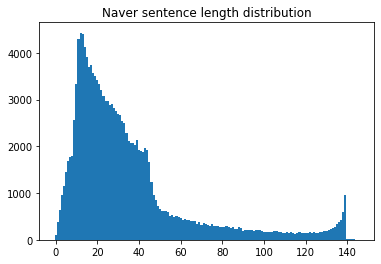

In [156]:
min_len = 999
max_len = 0
sum_len = 0

for sen in data['document']: 
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length 
    
print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int) 

for sen in data['document']: 
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Naver sentence length distribution")
plt.show()

outlier는 없어보이는데 문장이 엄청 긴 것들이 존재한다. 중복된 id는 없는것 같다. 

In [157]:
long_data = data[data['document'].apply(lambda x: len(x) >= 130)]
id_count = data.groupby('id')['document'].count()
id_count.describe()

count    146182.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: document, dtype: float64

minimum 이 1인 문장과 5이하인 문장을 살펴보자. 

In [158]:
min_data = data[data['document'].apply(lambda x: len(x)==1)]
min_data

,id,document,label
151,7348295,아,0
384,7679615,잼,1
584,7117896,1,0
593,6478189,4,0
1723,3412704,굿,1
...,...,...,...
143087,3609303,꺅,0
143913,7319057,욜,0
146537,7256630,ㅄ,0
146607,4602734,2,0


In [159]:
short_data = data[data['document'].apply(lambda x: len(x) <= 5)]
short_data

,id,document,label
28,6091784,재밋는뎅,1
54,7207064,재미있어요,1
55,5719655,전 좋아요,1
56,1651126,최고,0
72,5679106,졸작,0
...,...,...,...
149688,2740980,현대사회,1
149716,81753,쓰레기~,0
149717,5536736,적당 ㅎㅎ,1
149894,6472460,연기 끝장,1


리뷰의 길이가 1인 것은 의미없는 데이터 같다. 하지만 2글자 이상 짧은 리뷰도 호불호의 의미를 잘 전달하는 것같다. 그러므로 minimum(2)과 maximum(100) 길이를 지정해서 data를 필터링해준다. 

In [160]:
min_len_corpus = 2
max_len_corpus = 100 

data = data[data['document'].apply(lambda x: min_len_corpus <= len(x) <= max_len_corpus)]
len(data)

137397

8,785개의 데이터가 리뷰의 길이로 제거되었다. 이로인해 총 150,000개의 raw data중에서 137,397개의 데이터를 가지고 훈련을 시킬 것이다. 

#### SentencePiece 을 네이버 영화리뷰에 학습 
SentencePieceTrainer.Train: 
--input: one-sentence-per-line raw corpus file. No need to run tokenizer, normalizer or preprocessor. By default, SentencePiece normalizes the input with Unicode NFKC. You can pass a comma-separated list of files.    
--model_prefix: output model name prefix. <model_name>.model and <model_name>.vocab are generated.     
--vocab_size: vocabulary size, e.g., 8000, 16000, or 32000     
--character_coverage: amount of characters covered by the model, good defaults are: 0.9995 for languages with rich character set like Japanese or Chinese and 1.0 for other languages with small character set.     
--model_type: model type. Choose from unigram (default), bpe, char, or word. The input sentence must be pretokenized when using word type.

input file 만들어주기 

In [39]:
naver_path = os.getenv("HOME") + '/aiffel/sp_tokenizer/data/naver_corpus.txt'

with open(naver_path, 'w') as f:
    for row in data['document']:   # 이전 스텝에서 정제했던 corpus로 대체
        f.write(str(row) + '\n')

spm.SentencePieceTrainer          
4개의 모델과 단어장이 생성됐다. 
1. model= unigram/ vocab size=20k 
2. model= bpe/ vocab size=20k
3. model= unigram/ vocab size=10k
4. model= bpe/ vocab size=20k  

In [49]:
import sentencepiece as spm

naver_vocab_size = 20000
naver_vocab_10k = 10000

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=navermovie_uni_20k --vocab_size={}'.format(naver_path, naver_vocab_size)    
)
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=navermovie_bpe_20k --model_type=bpe --vocab_size={}'.format(naver_path, naver_vocab_size)    
)
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=navermovie_uni_10k --vocab_size={}'.format(naver_path, naver_vocab_10k)    
)
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=navermovie_bpe_10k --model_type=bpe --vocab_size={}'.format(naver_path, naver_vocab_10k)    
)

In [50]:
n1 = spm.SentencePieceProcessor()
n1.Load('navermovie_uni_20k.model')
n2 = spm.SentencePieceProcessor()
n2.Load('navermovie_bpe_20k.model')
n3 = spm.SentencePieceProcessor()
n3.Load('navermovie_uni_10k.model')
n4 = spm.SentencePieceProcessor()
n4.Load('navermovie_bpe_10k.model')

True

In [51]:
import csv
uni_20k_vocab = pd.read_csv('navermovie_uni_20k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
print(uni_20k_vocab[:5])
bpe_20k_vocab = pd.read_csv('navermovie_bpe_20k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
print(bpe_20k_vocab[:5])
uni_10k_vocab = pd.read_csv('navermovie_uni_10k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
print(uni_10k_vocab[:5])
bpe_10k_vocab = pd.read_csv('navermovie_bpe_10k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
print(bpe_10k_vocab[:5])

       0        1
0  <unk>  0.00000
1    <s>  0.00000
2   </s>  0.00000
3      . -3.32465
4      ▁ -3.48812
       0  1
0  <unk>  0
1    <s>  0
2   </s>  0
3     ..  0
4     영화 -1
       0        1
0  <unk>  0.00000
1    <s>  0.00000
2   </s>  0.00000
3      ▁ -3.25429
4      . -3.43798
       0  1
0  <unk>  0
1    <s>  0
2   </s>  0
3     ..  0
4     영화 -1


In [59]:
print(len(uni_20k_vocab))
print(len(bpe_20k_vocab))
print(len(uni_10k_vocab))
print(len(bpe_10k_vocab))

20000
20000
10000
10000


vocab 사전에 \<s> beginning of sentence \</s> end of sentence 둘다 포함되어 있고 \<unk>도 포함되어 있다. 

In [161]:
def sp_tokenize_naver(n, corpus, model):
    
    tensor = []
    
    for sentence in corpus:
        tensor.append(n.EncodeAsIds(sentence))
        
    with open("./{}.vocab".format(model), 'r') as f:
        vocab = f.readlines()
        
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]
        
        word_index.update({idx:word})
        word_index.update({word:idx})
        
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    return tensor, word_index, index_word 

In [162]:
tensor_uni20, word_index_uni20, index_word_uni20 = sp_tokenize_naver(n1, data['document'], 'navermovie_uni_20k')
tensor_bpe20, word_index_bpe20, index_word_bpe20 = sp_tokenize_naver(n2, data['document'], 'navermovie_bpe_20k')
tensor_uni10, word_index_uni10, index_word_uni10 = sp_tokenize_naver(n3, data['document'], 'navermovie_uni_10k')
tensor_bpe10, word_index_bpe10, index_word_bpe10 = sp_tokenize_naver(n4, data['document'], 'navermovie_uni_10k')

### Train, validation, test set 분리 
data 중에서 20% test 데이터로 설정하고 80%의 20%는 validation set으로 나눠주었다. 

In [163]:
y_train = np.array(data['label'])
print(len(tensor_uni20), len(y_train))

137397 137397


In [164]:
print(len(tensor_bpe20), len(y_train))

137397 137397


In [165]:
from sklearn.model_selection import train_test_split

x_train_uni20, x_test_uni20, y_train_uni20, y_test_uni20 = train_test_split(tensor_uni20, y_train, test_size=0.2)
x_train_uni20, x_val_uni20, y_train_uni20, y_val_uni20 = train_test_split(x_train_uni20, y_train_uni20, test_size=0.2)

x_train_bpe20, x_test_bpe20, y_train_bpe20, y_test_bpe20 = train_test_split(tensor_bpe20, y_train, test_size=0.2)
x_train_bpe20, x_val_bpe20, y_train_bpe20, y_val_bpe20 = train_test_split(x_train_bpe20, y_train_bpe20, test_size=0.2)


In [166]:
print('train:', len(x_train_uni20), 'test:', len(x_test_uni20), 'val:', len(x_val_uni20))
print('train:', len(x_train_bpe20), 'test:', len(x_test_bpe20), 'val:', len(x_val_bpe20))    

train: 87933 test: 27480 val: 21984
train: 87933 test: 27480 val: 21984


In [167]:
x_train_uni10, x_test_uni10, y_train_uni10, y_test_uni10 = train_test_split(tensor_uni10, y_train, test_size=0.2)
x_train_uni10, x_val_uni10, y_train_uni10, y_val_uni10 = train_test_split(x_train_uni10, y_train_uni10, test_size=0.2)

x_train_bpe10, x_test_bpe10, y_train_bpe10, y_test_bpe10 = train_test_split(tensor_bpe10, y_train, test_size=0.2)
x_train_bpe10, x_val_bpe10, y_train_bpe10, y_val_bpe10 = train_test_split(x_train_bpe10, y_train_bpe10, test_size=0.2)

print('train:', len(x_train_uni10), 'test:', len(x_test_uni10), 'val:', len(x_val_uni10))
print('train:', len(x_train_bpe10), 'test:', len(x_test_bpe10), 'val:', len(x_val_bpe10))    

train: 87933 test: 27480 val: 21984
train: 87933 test: 27480 val: 21984


### Model 설계
네이버 감성 분석했을때 LSTM이 성능이 가장 좋았으므로 여기선 LSTM 모델을 써 보았다.        
* model1, model1_1: vocab size 20k    
* model2, model2_1: vocab size 10k

In [168]:
from tensorflow import keras

vocab_size_20k = 20000    
word_vector_dim = 32  

model1 = keras.Sequential()

model1.add(keras.layers.Embedding(vocab_size_20k, word_vector_dim, input_shape=(None,)))
model1.add(keras.layers.LSTM(64))          
model1.add(keras.layers.Dense(10, activation='relu'))
model1.add(keras.layers.Dense(1, activation='sigmoid'))
         
model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 32)          640000    
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 665,493
Trainable params: 665,493
Non-trainable params: 0
_________________________________________________________________


In [169]:
model1_1 = keras.Sequential()

model1_1.add(keras.layers.Embedding(vocab_size_20k, word_vector_dim, input_shape=(None,)))
model1_1.add(keras.layers.LSTM(64))          
model1_1.add(keras.layers.Dense(10, activation='relu'))
model1_1.add(keras.layers.Dense(1, activation='sigmoid'))

In [170]:
vocab_size_10k = 10000    
word_vector_dim = 32  

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(vocab_size_10k, word_vector_dim, input_shape=(None,)))
model2.add(keras.layers.LSTM(64))          
model2.add(keras.layers.Dense(10, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
         
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 11        
Total params: 345,493
Trainable params: 345,493
Non-trainable params: 0
_________________________________________________________________


In [171]:
model2_1 = keras.Sequential()

model2_1.add(keras.layers.Embedding(vocab_size_10k, word_vector_dim, input_shape=(None,)))
model2_1.add(keras.layers.LSTM(64))          
model2_1.add(keras.layers.Dense(10, activation='relu'))
model2_1.add(keras.layers.Dense(1, activation='sigmoid'))

### 모델 훈련 및 시각화 

loss, accuracy가 크게 차이가 없고, validation loss, accuracy 의 감소, 증가 추세가 일정하지가 않다. 아무래도 모델을 더 연구해서 변화를 줘야 할 것 같다. 

In [172]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [173]:
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 20
batch_size = 128

history_uni20k = model1.fit(x_train_uni20,
                    y_train_uni20,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_uni20, y_val_uni20),
                    callbacks=es,
                    verbose=2) 

Epoch 1/20
687/687 - 15s - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 2/20
687/687 - 13s - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 3/20
687/687 - 13s - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 4/20
687/687 - 13s - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 5/20
687/687 - 13s - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 6/20
687/687 - 13s - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 7/20
687/687 - 13s - loss: 0.6931 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 00007: early stopping


In [174]:
model1_1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bpe20k = model1_1.fit(x_train_bpe20,
                    y_train_bpe20,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_bpe20, y_val_bpe20),
                    callbacks=es, 
                    verbose=2) 

Epoch 1/20
687/687 - 16s - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 2/20
687/687 - 13s - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 3/20
687/687 - 13s - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 4/20
687/687 - 13s - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 5/20
687/687 - 13s - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 6/20
687/687 - 13s - loss: 0.6931 - accuracy: 0.5021 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 00006: early stopping


In [175]:
def visualize_train(train_history, param):
    # summarize history for accuracy
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('{}_accuracy'.format(param))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('{}_loss'.format(param))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

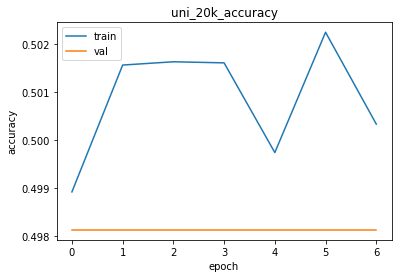

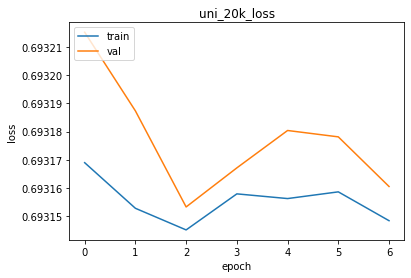

In [176]:
visualize_train(history_uni20k, 'uni_20k')

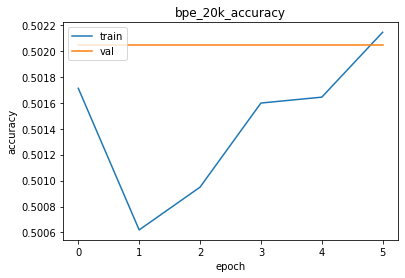

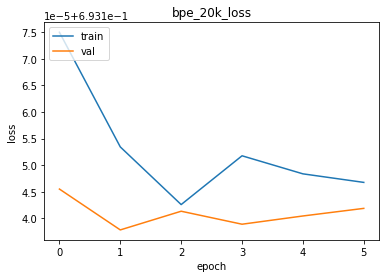

In [177]:
visualize_train(history_bpe20k, 'bpe_20k')

In [178]:
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history_uni10k = model2.fit(x_train_uni10,
                    y_train_uni10,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_uni10, y_val_uni10),
                    callbacks=es,
                    verbose=2) 

Epoch 1/20
687/687 - 14s - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.4955
Epoch 2/20
687/687 - 12s - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.4955
Epoch 3/20
687/687 - 12s - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 4/20
687/687 - 12s - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 5/20
687/687 - 12s - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 6/20
687/687 - 12s - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 7/20
687/687 - 12s - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.4955
Epoch 8/20
687/687 - 12s - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 9/20
687/687 - 12s - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 00009: early stopping


In [179]:
model2_1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bpe10k = model2_1.fit(x_train_bpe10,
                    y_train_bpe10,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_bpe10, y_val_bpe10),
                    callbacks=es,
                    verbose=1) 

Epoch 1/20
687/687 [==============================] - 15s 20ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 2/20
687/687 [==============================] - 13s 20ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 3/20
687/687 [==============================] - 13s 20ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 4/20
687/687 [==============================] - 13s 20ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 5/20
687/687 [==============================] - 13s 19ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4934
Epoch 6/20
687/687 [==============================] - 13s 19ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 00006: early stopping


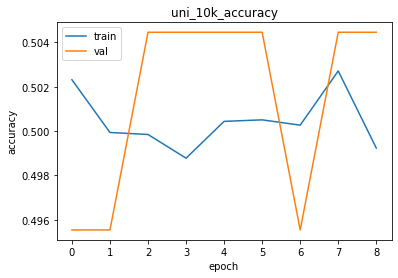

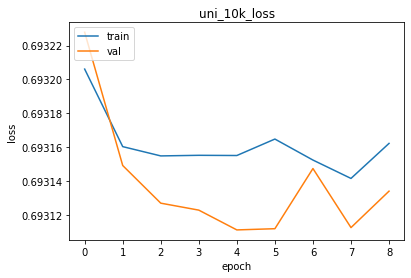

In [180]:
visualize_train(history_uni10k, 'uni_10k')

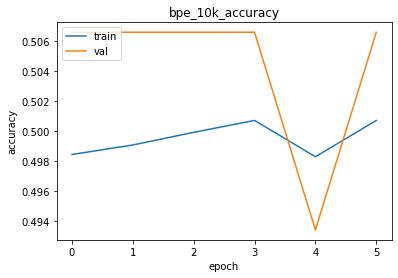

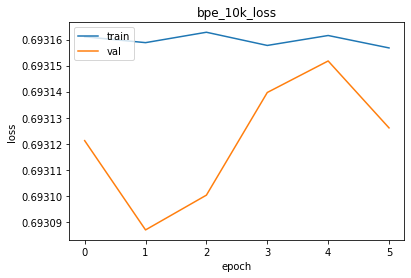

In [181]:
visualize_train(history_bpe10k, 'bpe_10k')

### 테스트
테스트 결과는 loss, accuracy 모두 4가지 모델 큰 차이가 없다. 

In [183]:
uni20k_results = model1.evaluate(x_test_uni20,  y_test_uni20, verbose=2)

859/859 - 5s - loss: 0.6931 - accuracy: 0.5016


In [184]:
bpe20k_results = model1_1.evaluate(x_test_bpe20, y_test_bpe20, verbose=2)

859/859 - 5s - loss: 0.6932 - accuracy: 0.4982


In [187]:
uni10k_results = model2.evaluate(x_test_uni10,  y_test_uni10, verbose=2)

859/859 - 5s - loss: 0.6932 - accuracy: 0.4979


In [188]:
bpe10k_results = model2_1.evaluate(x_test_bpe10, y_test_bpe10, verbose=2)

859/859 - 5s - loss: 0.6931 - accuracy: 0.5002
